# An approach to recognize masked face using Deep Learning

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

root_path = '/content/drive/MyDrive/4.2/CSE 4238 - Soft Computing Lab/Project/Dataset/'

Mounted at /content/drive


# Import Library

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import csv
from PIL import Image

# Useful Function

In [ ]:
def createFileList(myDir):
  fileList = []
  for root, dirs, files in os.walk(myDir, topdown=False):
    for name in files:
      if name.endswith('.jpg') or name.endswith('.png'):
        fullName = os.path.join(root, name)
        fileList.append(fullName)
  return fileList

In [ ]:
def plot_sample_images(X, y, ncols=5, num=25):
  num = int(min(num, len(y)))
  nrows = math.ceil(num / ncols)
  fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols, nrows))
  fig.subplots_adjust(hspace=0.8)
  for i, ax in enumerate(axes.flatten()):
    if i < num:
      ax.imshow(X[i].reshape(64, 64), cmap="gray")
      ax.set_title(str(y[i]))
    ax.axis('off')
  plt.show()

# With Mask

In [ ]:
myFileList = createFileList(root_path+'with_mask/')

for file in myFileList:
  img_file = Image.open(file)
  img_file = img_file.resize((64, 64))
  img_grey = img_file.convert('L')

  value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
  value = value.flatten()
  value = value.tolist()
  value.insert(0, '1')
  with open(root_path + "with_mask_img_pixels.csv", 'a') as f:
    writer = csv.writer(f)
    writer.writerow(value)

In [ ]:
header_list = ['label']
for x in range(1, 4097):
  header_list.append('pixel'+str(x))

In [ ]:
df = pd.read_csv(root_path + "with_mask_img_pixels.csv", names=header_list)

In [ ]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel4057,pixel4058,pixel4059,pixel4060,pixel4061,pixel4062,pixel4063,pixel4064,pixel4065,pixel4066,pixel4067,pixel4068,pixel4069,pixel4070,pixel4071,pixel4072,pixel4073,pixel4074,pixel4075,pixel4076,pixel4077,pixel4078,pixel4079,pixel4080,pixel4081,pixel4082,pixel4083,pixel4084,pixel4085,pixel4086,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,pixel4096
0,1,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254,255,253,252,242,217,171,128,108,94,91,83,86,135,203,248,254,254,255,...,26,32,34,38,38,38,39,35,29,25,25,53,132,71,33,21,24,27,29,32,34,35,32,26,31,34,39,39,31,29,28,26,26,31,35,143,248,255,255,255
1,1,223,223,223,223,223,223,223,223,224,224,224,224,224,224,224,224,225,225,225,225,225,225,225,225,225,227,226,226,226,226,225,224,226,226,226,226,226,226,226,...,177,171,173,180,182,182,183,185,194,220,233,231,229,228,228,228,228,228,229,228,228,229,228,229,229,229,220,193,186,181,176,175,171,164,162,160,154,150,175,229
2,1,184,189,194,191,175,175,177,171,167,179,174,175,176,170,172,177,161,161,173,167,164,175,174,162,171,114,75,82,83,80,82,82,82,82,84,83,84,85,84,...,63,66,67,68,71,75,77,78,78,78,80,81,83,80,75,74,71,67,53,38,35,38,30,36,30,19,29,25,33,32,31,28,27,28,29,36,33,28,37,52
3,1,172,222,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,213,194,183,198,215,218,218,218,218,218,218,218,218,218,217,217,215,214,212,211,210,...,79,97,160,159,144,133,123,117,109,97,89,86,88,85,85,85,84,85,87,92,102,117,127,132,132,133,151,215,218,216,215,212,206,184,165,118,147,138,130,131
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,60,71,71,72,71,71,70,71,71,70,70,69,68,69,69,67,67,67,68,69,68,...,125,93,64,53,79,100,110,116,119,122,121,120,122,125,127,130,137,142,143,142,146,123,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,1,219,221,221,222,222,224,224,225,225,226,226,226,226,227,227,227,226,227,227,227,226,229,184,140,114,85,86,93,165,208,179,131,102,91,78,89,131,170,159,...,79,111,117,78,67,44,22,30,24,23,29,28,26,28,31,28,75,95,22,14,15,12,16,30,32,36,36,38,41,50,52,53,47,45,47,51,73,100,91,80
854,1,179,181,183,184,186,187,188,189,191,192,194,195,196,198,199,200,201,202,203,204,205,207,208,210,211,212,213,214,215,217,218,219,221,223,224,225,227,228,230,...,83,76,75,90,97,80,78,94,124,104,94,86,78,65,75,90,80,66,72,85,96,101,81,43,34,29,44,50,55,57,63,117,173,149,174,175,189,200,226,240
855,1,57,59,59,62,66,73,78,78,75,71,70,72,76,79,80,77,78,92,109,120,119,116,118,144,168,166,135,120,127,128,127,127,127,125,125,125,126,127,127,...,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
856,1,138,142,155,103,152,149,93,144,160,126,124,160,154,146,152,183,194,179,176,232,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,118,132,142,119,79,53,91,126,159,120,53,83,136,113,71,95,104,70,68,114,135,139,144,154,162,170,176,179,182,183,185,185,183,183,184,183,189,212,217,212


In [ ]:
X_data = df.drop("label", axis=1).values.astype(np.uint8)
y_data = df["label"].values

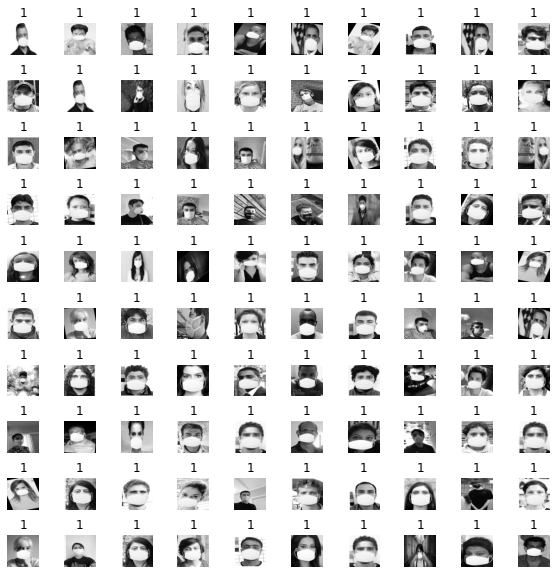

In [ ]:
plot_sample_images(X_data, y_data, ncols=10, num=100)

In [ ]:
df.to_csv(root_path + 'with_mask_img_pixels.csv', index=False)

# Without Mask

In [ ]:
myFileList = createFileList(root_path+'without_mask/')

for file in myFileList:
  img_file = Image.open(file)
  img_file = img_file.resize((64, 64))
  img_grey = img_file.convert('L')

  value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
  value = value.flatten()
  value = value.tolist()
  value.insert(0, '0')
  with open(root_path + "without_mask_img_pixels.csv", 'a') as f:
    writer = csv.writer(f)
    writer.writerow(value)

In [ ]:
header_list = ['label']
for x in range(1, 4097):
  header_list.append('pixel'+str(x))

In [ ]:
df = pd.read_csv(root_path + "without_mask_img_pixels.csv", names=header_list)

In [ ]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel4057,pixel4058,pixel4059,pixel4060,pixel4061,pixel4062,pixel4063,pixel4064,pixel4065,pixel4066,pixel4067,pixel4068,pixel4069,pixel4070,pixel4071,pixel4072,pixel4073,pixel4074,pixel4075,pixel4076,pixel4077,pixel4078,pixel4079,pixel4080,pixel4081,pixel4082,pixel4083,pixel4084,pixel4085,pixel4086,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,pixel4096
0,0,206,206,207,207,205,207,214,227,229,226,202,174,159,158,175,179,179,177,178,175,179,194,211,205,180,179,171,166,167,163,166,246,255,254,253,253,245,211,181,...,202,196,188,177,161,144,96,32,33,32,30,29,29,33,37,40,41,42,44,46,46,43,41,38,35,33,34,34,36,37,39,39,38,38,42,42,42,44,45,46
1,0,210,145,100,197,174,98,76,88,125,214,148,82,107,106,65,45,44,48,58,49,45,41,81,104,138,104,113,57,51,53,36,36,35,40,34,26,30,37,32,...,240,227,205,203,208,209,210,213,215,220,226,230,232,230,227,228,228,224,221,217,210,192,153,80,32,28,31,44,50,31,18,17,13,94,225,239,237,236,238,238
2,0,162,164,159,156,154,152,133,100,83,110,158,149,145,143,162,167,162,159,101,58,138,162,162,144,143,146,140,131,124,130,128,119,115,120,127,130,136,152,168,...,185,185,180,174,160,145,143,151,158,161,156,142,126,121,126,138,140,139,137,138,135,124,125,128,124,120,117,118,119,121,123,124,125,122,124,124,126,122,126,125
3,0,228,228,228,228,227,226,226,227,227,226,227,227,226,227,227,226,226,227,226,226,225,226,225,225,225,226,226,226,226,226,226,226,226,225,225,226,227,226,227,...,108,96,105,108,114,145,156,102,77,84,83,82,72,63,150,220,244,247,238,192,152,154,156,148,138,152,166,164,156,144,150,159,161,157,151,179,185,192,201,204
4,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,63,60,61,60,59,59,58,58,61,98,67,61,78,83,60,62,65,65,64,62,63,67,70,71,72,72,72,70,69,70,68,70,72,75,77,80,78,75,74,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,0,255,255,255,184,155,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,161,161,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,...,172,176,178,187,195,200,203,210,210,208,203,200,204,209,212,213,213,210,203,193,184,177,174,175,175,177,138,8,2,7,34,50,41,42,15,8,7,7,6,4
677,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,94,169,238,253,253,230,174,166,220,250,244,248,148,221,255,161,161,255,...,21,20,21,25,105,111,69,77,93,101,106,112,115,116,117,115,118,100,63,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
678,0,255,255,255,255,255,255,255,255,255,255,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,70,65,61,57,57,59,60,62,60,60,62,60,70,79,73,35,163,251,255,255,255,255,224,112,130,132,100,100,131,140,141,147,137,137,157,143,120,193,255,255
679,0,244,244,244,243,241,242,242,243,243,243,241,241,242,242,242,242,241,241,241,242,240,239,238,235,235,234,233,236,238,238,239,240,241,241,242,241,242,242,242,...,172,196,196,202,211,221,226,228,227,229,228,226,224,226,230,230,230,230,231,132,78,75,69,69,67,66,68,67,76,128,82,67,69,67,70,69,66,62,66,66


In [ ]:
X_data = df.drop("label", axis=1).values.astype(np.uint8)
y_data = df["label"].values

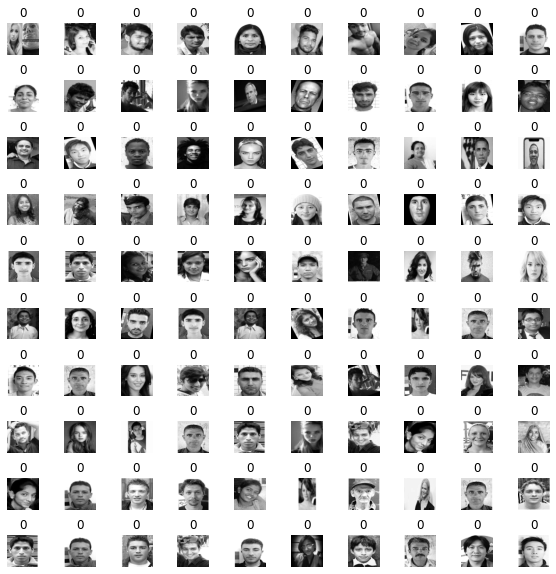

In [ ]:
plot_sample_images(X_data, y_data, ncols=10, num=100)

In [ ]:
df.to_csv(root_path + 'without_mask_img_pixels.csv', index=False)